# Border Representation

Allen's interval algebra is a calculus for temporal reasoning.
The calculus defines possible relations between time intervals and provides a composition table that can be used as a basis for reasoning about temporal descriptions of events.

James Allen, has indicated that we can represent time as points as
well as intervals. Considering below two sentences -
We found the letter at twelve noon.
We found the letter yesterday.
The ’twelve noon’ in the first sentence states a precise point of time and ’yesterday’
in the second sentence state an interval of time when the event of finding letter
occurred. These sentences are an example of temporal precision. Many times,
sentences do not consist of temporal precision. Usually, English sentences use
temporal references in the form of tenses to relate two events in the sentences. For
example, in the below two sentences -
We found the letter while John was away.
We found the letter after we made the decision.
The words ’while’ and ’after’ give a temporal reference by connecting two events.
Furthermore, He states that by using a temporal interval instead of a temporal point,
it is easier to avoid irrelevant facts. Thus, 13 relations shown in below table were
introduced to relate two time intervals. These relations are also known as Allen
Interval Relation.

# Relation table

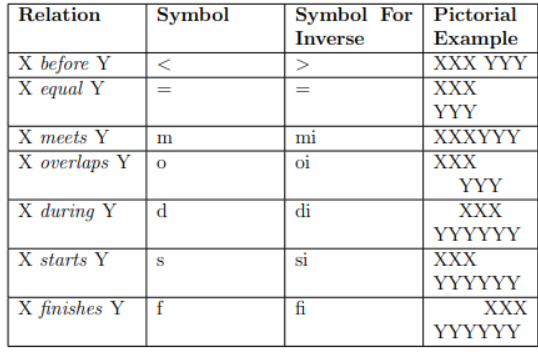

# Temporal representation of strings

Using these relations, two intervals a and a' overlap can be depicted as
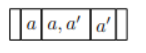
Which means,
BOX 1 The string starts with an empty box for times before a.
BOX 2 The second box contains a since the string a has started in that time and a'is yet to start.
BOX 3 Since the two strings overlap each other, so in this box a ends and a'starts.
BOX 4 This box contains a' because in this time a' has ended.
BOX 5 This empty box represents times after a'


# Border representation

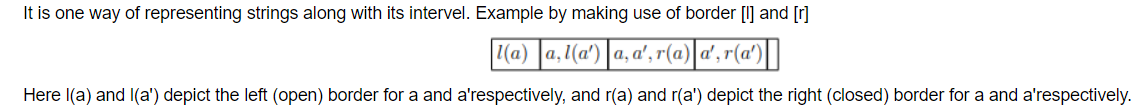

# Superposition Theorm [Strings of non empty sets]

This theorm make use of strings that satisfy certain condition to build all 13 allen relations. These constrains/rules are
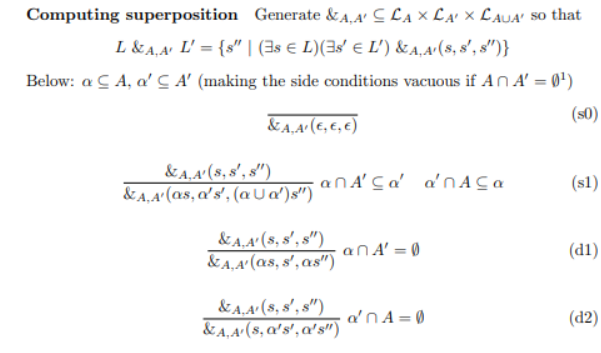

# Implementation

In [1]:
def superpose(string1, string2, voc1, voc2):
    S0='S0'
    S1='S1'
    D1='D1'
    D2='D2'
    temp = [[],[]]
    if len(string1) == len(string2) == 0:
        temp[0].append(string1)
        temp[1].append([S0])
        return temp[0],temp[1]
    else:
        if len(string1) > 0:
            h1 = string1[0]
            t1 = string1[1:]
            h1v2 = h1.intersection(voc2)
            if len(h1v2) == 0:
                res,rule = superpose(t1,string2,voc1,voc2)
                for i in res:
                    temp[0].append([h1] + i)
                for j in rule:
                    temp[1].append(j + [D1])
                    
            if len(string2) > 0:
                h2 = string2[0]
                t2 = string2[1:]
                h3 = h1.union(h2)
                if h1v2.issubset(h2):
                    h2v1 = h2.intersection(voc1)
                    if h2v1.issubset(h1):
                        res,rule = superpose(t1,t2,voc1,voc2)
                        for i in res:
                            temp[0].append([h3] + i)
                        for j in rule:
                            temp[1].append(j + [S1])
        if len(string2) > 0:
            h2 = string2[0]
            t2 = string2[1:]
            h2v1 = h2.intersection(voc1)
            if len(h2v1) == 0:
                res,rule = superpose(string1,t2,voc1,voc2)
                for i in res:
                    temp[0].append([h2] + i)
                for j in rule:
                    temp[1].append(j + [D2])
        return temp[0],temp[1]

def super(s1,s2):
    test_list = []
    return superpose(s1,s2,voc(s1),voc(s2))

def voc(string): 
    if len(string) == 0:
        return {}
    else:
        return string[0].union(voc(string[1:]))

def proj(string,set): 
    if len(string) == 0:
        return string
    else:
        h1 = string[0].intersection(set)
        if len(h1) == 0:
            return proj(string[1:],set)
        else:
            return [h1] + proj(string[1:],set)

# Main function call to process the result.

In [2]:
from tabulate import tabulate #For formating the output.
a,b = super([{'l0'},{'r0'}],[{'l1'},{'r1'}])

# Output

In [3]:
type1 = ['b','m','o','fi','di','s','eq','si','d','f','oi','mi','bi'] 
print(tabulate(zip(type1,a,b),headers=['Type','Allen Relation', 'Superposition Rules Implied[Border]']))

Type    Allen Relation                    Superposition Rules Implied[Border]
------  --------------------------------  -------------------------------------
b       [{'l0'}, {'r0'}, {'l1'}, {'r1'}]  ['S0', 'D2', 'D2', 'D1', 'D1']
m       [{'l0'}, {'r0', 'l1'}, {'r1'}]    ['S0', 'D2', 'S1', 'D1']
o       [{'l0'}, {'l1'}, {'r0'}, {'r1'}]  ['S0', 'D2', 'D1', 'D2', 'D1']
fi      [{'l0'}, {'l1'}, {'r0', 'r1'}]    ['S0', 'S1', 'D2', 'D1']
di      [{'l0'}, {'l1'}, {'r1'}, {'r0'}]  ['S0', 'D1', 'D2', 'D2', 'D1']
s       [{'l0', 'l1'}, {'r0'}, {'r1'}]    ['S0', 'D2', 'D1', 'S1']
eq      [{'l0', 'l1'}, {'r0', 'r1'}]      ['S0', 'S1', 'S1']
si      [{'l0', 'l1'}, {'r1'}, {'r0'}]    ['S0', 'D1', 'D2', 'S1']
d       [{'l1'}, {'l0'}, {'r0'}, {'r1'}]  ['S0', 'D2', 'D1', 'D1', 'D2']
f       [{'l1'}, {'l0'}, {'r0', 'r1'}]    ['S0', 'S1', 'D1', 'D2']
oi      [{'l1'}, {'l0'}, {'r1'}, {'r0'}]  ['S0', 'D1', 'D2', 'D1', 'D2']
mi      [{'l1'}, {'l0', 'r1'}, {'r0'}]    ['S0', 'D1', 'S1', 'D2']
bi      [{'l1'

# Allen relation [Interior representation]

It is one way of representing strings along with its intervel.
Example by making use of [] sets to depicts the intervel. interior representation of string 'i' is [][i][]

# Superposition theorm [Strings without stutters]

The rule of so and s1 are similar to that of strings of non empty set, but here instead of d1 and d2 we mke use of new rules b1 and b2.
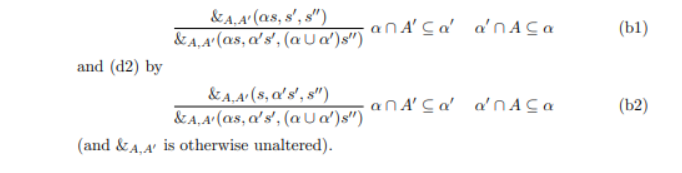

# Implementation

In [4]:
def superpose_interior(string1, string2, voc1, voc2):
    S0='S0'
    S1='S1'
    B1='B1'
    B2='B2'
    temp = [[],[]] 
    if len(string1) == len(string2) == 0:
        temp[0].append(string1)
        temp[1].append([S0])
        return temp[0],temp[1]
    else:
        if len(string1) > 0:
            h1 = string1[0]
            t1 = string1[1:]
            if len(string2) > 0:
                h2 = string2[0]
                t2 = string2[1:]
                h3 = h1.union(h2)
                h1v2 = h1.intersection(voc2)
                if h1v2.issubset(h2):
                    h2v1 = h2.intersection(voc1)
                    if h2v1.issubset(h1):
                        res,rule = superpose_interior(t1,t2,voc1,voc2)
                        for i in res:
                            temp[0].append([h3] + i)
                        for j in rule:
                            temp[1].append(j + [S1])
                        res,rule = superpose_interior(string1,t2,voc1,voc2)
                        for i in res:
                            temp[0].append([h3] + i)
                        for j in rule:
                            temp[1].append(j + [B1])
                        res,rule = superpose_interior(t1,string2,voc1,voc2)
                        for i in res:
                            temp[0].append([h3] + i)
                        for j in rule:
                            temp[1].append(j + [B2])     
        return temp[0],temp[1]

def super_interior(s1,s2):
    return superpose_interior(s1,s2,voc(s1),voc(s2))

# Main function call to process the result.

In [5]:
c,d = super_interior([set(),{0},set()],[set(),{1},set()])


# output

In [6]:
type = ['eq','si','s','mi','bi','f','oi','d','m','fi','di','o','b'] 
print(tabulate(zip(type,c,d),headers=['Type','Allen Relation', 'Superposition Rules Implied[Interior]']))

Type    Allen Relation                    Superposition Rules Implied[Interior]
------  --------------------------------  ---------------------------------------
eq      [set(), {0, 1}, set()]            ['S0', 'S1', 'S1', 'S1']
si      [set(), {0, 1}, {0}, set()]       ['S0', 'S1', 'B2', 'B1', 'S1']
s       [set(), {0, 1}, {1}, set()]       ['S0', 'S1', 'B1', 'B2', 'S1']
mi      [set(), {1}, {0}, set()]          ['S0', 'S1', 'B2', 'S1', 'B1']
bi      [set(), {1}, set(), {0}, set()]   ['S0', 'S1', 'B2', 'B2', 'B1', 'B1']
f       [set(), {1}, {0, 1}, set()]       ['S0', 'S1', 'S1', 'B2', 'B1']
oi      [set(), {1}, {0, 1}, {0}, set()]  ['S0', 'S1', 'B2', 'B1', 'B2', 'B1']
d       [set(), {1}, {0, 1}, {1}, set()]  ['S0', 'S1', 'B1', 'B2', 'B2', 'B1']
m       [set(), {0}, {1}, set()]          ['S0', 'S1', 'B1', 'S1', 'B2']
fi      [set(), {0}, {0, 1}, set()]       ['S0', 'S1', 'S1', 'B1', 'B2']
di      [set(), {0}, {0, 1}, {0}, set()]  ['S0', 'S1', 'B2', 'B1', 'B1', 'B2']
o       [set(), {

# Allen transitivity table

Usually, a network represents these relations, where the node represents individual
intervals. The arc between the nodes depicts the relation between the two intervals.
When a new interval relation is introduced in the network, transitivity rules are
applied to compute other consequences between these intervals, which have been
affected due to the new fact. For example, if a new relation (i is during j) is added to
constraints such as j is before k, then it can be concluded that i must be before k.

# A reduct

Reduct is a function defined to find a string with respect to a particular interval. It
uses component-wise intersection which can be stated as -
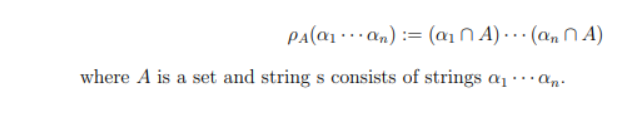

In [7]:
def red(str,set): 
    if len(str) == 0:
        return str
    else:
        #lts= ' '.join([str(elem) for elem in str])
        h1 = str[0].intersection(set)
        return [h1] + red(str[1:],set)

# Block Compression

Compression is used to remove repeated intervals (called as stutters) in a string. This
is known as block compression with which we can obtain a stutterless string. It uses
the following formula
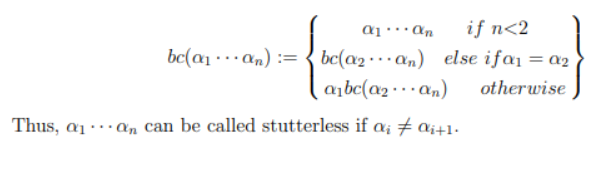

In [8]:
def bc(str): 
    if len(str) < 2:
        return str
    else:
        h,t = str[0],str[1:]
        if h == t[0]:
            return bc(t)
        else:
            return [h] + bc(t)

In [9]:
def allen(x,y,r):
    e = set({})
    if r == "b":
        return [e, {x}, e, {y}, e]
    elif r == "o":
        return [e, {x}, {x,y}, {y}, e]
    elif r == "m":
        return [e, {x}, {y}, e]
    elif r == "d":
        return [e, {y}, {x,y}, {y}, e]
    elif r == "s":
        return [e, {x,y}, {y}, e]
    elif r == "f":
        return [e, {y}, {x,y}, e]
    if r == "bi":
        return [e, {y}, e, {x}, e]
    elif r == "oi":
        return [e, {y}, {x,y}, {x}, e]
    elif r == "mi":
        return [e, {y}, {x}, e]
    elif r == "di":
        return [e, {x}, {x,y}, {x}, e]
    elif r == "si":
        return [e, {x,y}, {x}, e]
    elif r == "fi":
        return [e, {x}, {x,y}, e]
    elif r == "eq":
        return [e, {x,y}, e]

In [10]:
def allInv(string,x,y):
    e = set({})
    if string == [e, {x}, e, {y}, e]:
        return "b"
    elif string == [e, {x}, {x,y}, {y}, e]:
        return "o"
    elif string == [e, {x}, {y}, e]:
        return "m"
    elif string == [e, {y}, {x,y}, {y}, e]:
        return "d"
    elif string == [e, {x,y}, {y}, e]:
        return "s"
    elif string == [e, {y}, {x,y}, e]:
        return "f"
    elif string == [e, {x}, e, {y}, e]:
        return "bi"
    elif string == [e, {y}, {x,y}, {x}, e]:
        return "oi"
    elif string == [e, {y}, {x}, e]:
        return "mi"
    elif string == [e, {x}, {x,y}, {x}, e]:
        return "di"
    elif string == [e, {x,y}, {x}, e]:
        return "si"
    elif string == [e, {x}, {x,y}, e]:
        return "fi"
    elif string == [e, {x,y}, e]:
        return "eq"

# Transitivity table function

In [11]:
def tt(r1,r2):
    temp = []
    res,rule = super_interior(allen(0,1,r1), allen(1,2,r2))
    for s in res:
        temp.append(allInv(bc(red(s,{0,2})),0,2))
    return temp

# Test function

In [12]:
def test():
    print("Examples:")
    s1 = allen(0,1,'d')
    print(" allen(0,1,'d')  is ", s1)
    s2 = allen(1,2,'m')
    print(" allen(1,2,'m')  is ", s2)
    print(" super_interior(allen(0,1,'d'), allen(1,2,'m'))  is ")
    print(" ", super_interior(s1,s2)[0][0])
    print(" bc(red([...],{0,2}))  is ",
          bc(red(super_interior(s1,s2)[0][0],{0,2})))

    print(" tt('d','m')  is ", tt("d","m"))
    print(" tt('b','d')  is ", tt("b","d"))
    print(" tt('fi','d') is ", tt("fi","d"))
    print(" tt('s','di') is ", tt("s","di"))

# Call to test main function

In [13]:
test()

Examples:
 allen(0,1,'d')  is  [set(), {1}, {0, 1}, {1}, set()]
 allen(1,2,'m')  is  [set(), {1}, {2}, set()]
 super_interior(allen(0,1,'d'), allen(1,2,'m'))  is 
  [set(), {1}, {0, 1}, {1}, {2}, set()]
 bc(red([...],{0,2}))  is  [set(), {0}, set(), {2}, set()]
 tt('d','m')  is  ['b']
 tt('b','d')  is  ['s', 'd', 'm', 'o', 'b']
 tt('fi','d') is  ['s', 'd', 'o']
 tt('s','di') is  ['m', 'fi', 'di', 'o', 'b']
